In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import time
import os #to pause with pause()
import winsound

In [42]:
def densityParams(r1):
    """Return the constant parameters rho0, h0 and H for density function"""
    
    global densityCounter
    h = (r1 - r_e)
    flag = True
    while(flag):
        if h > h0_list.iloc[-1]:
            rho0, h0, H = rh0_list.iloc[-1], h, H_list.iloc[-1]         #for the case of no molecular drag
            flag = False
        elif (h <= h0_list.iloc[densityCounter] and h > h0_list.iloc[densityCounter-1]):
            rho0, h0, H = rho0_list.iloc[densityCounter-1], h0_list.iloc[densityCounter-1], H_list.iloc[densityCounter-1] 
            flag = False
        elif dh >= 0:
            densityCounter +=1
            #print("densityCounter:", densityCounter, " and h = ", h)
        elif dh < 0:
            densityCounter -=1
            #print("density Counter: ", densityCounter, " and h = ", h)
    return rho0, h0, H

In [43]:
def rk4(x, y, vx, vy, m, t):
    """Return the position (x, y), the velocity (vx,vy) and the mass of the satellite given initial values, step time and mu in 
    the context of the Planar Circular Restricted 3 Body Problem (PCR3BP)"""
    
    xAux = x
    yAux = y
    vxAux = vx
    vyAux = vy   
    mAux = m
    tAux = t
    
    r1Aux = ((xAux+mu)**2 + yAux**2)**0.5
    r2Aux = ((xAux+mu-1)**2 + yAux**2)**0.5
    vAux = (vxAux**2+vyAux**2)**0.5
    hAux = (r1Aux - r_e)
    rhoAux = rho0 * e**(-(hAux-h0)/H)
    vDragAux = ((vxAux - yAux)**2 + (vyAux + xAux)**2)**0.5
    oSAux = -wS*tAux + oS0 
    xSAux = aS*np.cos(oSAux)
    ySAux = aS*np.sin(oSAux)
    rSAux = ((xAux-xSAux)**2 + (yAux-ySAux)**2)**0.5

    k11 = vxAux 
    k12 = vyAux
    k13 = 2*vyAux + xAux - (1-mu)*(xAux+mu)/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*(xAux+mu-1)/r2Aux**3 + Th/m*vxAux/vAux - k/m*rhoAux*vDragAux*(vxAux-yAux) - mS*(xAux-xSAux)/rSAux**3 - mS*xSAux/aS**3   
    k14 = -2*vxAux + yAux - (1-mu)*yAux/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*yAux/r2Aux**3 + Th/m*vyAux/vAux - k/m*rhoAux*vDragAux*(vyAux + xAux) - mS*(yAux-ySAux)/rSAux**3 - mS*ySAux/aS**3
    k15 = -NTh * dm * f
   
    
    
    xAux = x + dt/2 * k11
    yAux = y + dt/2 * k12
    vxAux = vx + dt/2 * k13
    vyAux = vy + dt/2 * k14   
    mAux = m + dt/2 * k15 
    tAux = t + dt/2
    
    r1Aux = ((xAux+mu)**2 + yAux**2)**0.5
    r2Aux = ((xAux+mu-1)**2 + yAux**2)**0.5
    vAux = (vxAux**2+vyAux**2)**0.5
    hAux = (r1Aux - r_e)
    rhoAux = rho0 * e**(-(hAux-h0)/H)
    vDragAux = ((vxAux - yAux)**2 + (vyAux + xAux)**2)**0.5
    oSAux = -wS*tAux + oS0 
    xSAux = aS*np.cos(oSAux)
    ySAux = aS*np.sin(oSAux)
    rSAux = ((xAux-xSAux)**2 + (yAux-ySAux)**2)**0.5

    k21 = vxAux 
    k22 = vyAux
    k23 = 2*vyAux + xAux - (1-mu)*(xAux+mu)/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*(xAux+mu-1)/r2Aux**3 + Th/m*vxAux/vAux - k/m*rhoAux*vDragAux*(vxAux-yAux) - mS*(xAux-xSAux)/rSAux**3 - mS*xSAux/aS**3
    k24 = -2*vxAux + yAux - (1-mu)*yAux/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*yAux/r2Aux**3 + Th/m*vyAux/vAux - k/m*rhoAux*vDragAux*(vyAux + xAux) - mS*(yAux-ySAux)/rSAux**3 - mS*ySAux/aS**3
    k25 = -NTh * dm * f
    
    
    
    xAux = x + dt/2 * k21
    yAux = y + dt/2 * k22
    vxAux = vx + dt/2 * k23
    vyAux = vy + dt/2 * k24    
    mAux = m + dt/2 * k25
    tAux = t + dt/2
    
    r1Aux = ((xAux+mu)**2 + yAux**2)**0.5
    r2Aux = ((xAux+mu-1)**2 + yAux**2)**0.5
    vAux = (vxAux**2+vyAux**2)**0.5
    hAux = (r1Aux - r_e)
    rhoAux = rho0 * e**(-(hAux-h0)/H)
    vDragAux = ((vxAux - yAux)**2 + (vyAux + xAux)**2)**0.5
    oSAux = -wS*tAux + oS0 
    xSAux = aS*np.cos(oSAux)
    ySAux = aS*np.sin(oSAux)
    rSAux = ((xAux-xSAux)**2 + (yAux-ySAux)**2)**0.5

    k31 = vxAux 
    k32 = vyAux
    k33 = 2*vyAux + xAux - (1-mu)*(xAux+mu)/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*(xAux+mu-1)/r2Aux**3 + Th/m*vxAux/vAux - k/m*rhoAux*vDragAux*(vxAux-yAux) - mS*(xAux-xSAux)/rSAux**3 - mS*xSAux/aS**3
    k34 = -2*vxAux + yAux - (1-mu)*yAux/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*yAux/r2Aux**3 + Th/m*vyAux/vAux - k/m*rhoAux*vDragAux*(vyAux + xAux) - mS*(yAux-ySAux)/rSAux**3 - mS*ySAux/aS**3
    k35 = -NTh * dm * f
    
    
    
    xAux = x + dt * k31
    yAux = y + dt * k32
    vxAux = vx + dt * k33
    vyAux = vy + dt * k34    
    mAux = m + dt * k35
    tAux = t + dt
    
    r1Aux = ((xAux+mu)**2 + yAux**2)**0.5
    r2Aux = ((xAux+mu-1)**2 + yAux**2)**0.5
    vAux = (vxAux**2+vyAux**2)**0.5
    hAux = (r1Aux - r_e)
    rhoAux = rho0 * e**(-(hAux-h0)/H)
    vDragAux = ((vxAux - yAux)**2 + (vyAux + xAux)**2)**0.5
    oSAux = -wS*tAux + oS0 
    xSAux = aS*np.cos(oSAux)
    ySAux = aS*np.sin(oSAux)
    rSAux = ((xAux-xSAux)**2 + (yAux-ySAux)**2)**0.5

    k41 = vxAux 
    k42 = vyAux
    k43 = 2*vyAux + xAux - (1-mu)*(xAux+mu)/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*(xAux+mu-1)/r2Aux**3 + Th/m*vxAux/vAux - k/m*rhoAux*vDragAux*(vxAux-yAux) - mS*(xAux-xSAux)/rSAux**3 - mS*xSAux/aS**3
    k44 = -2*vxAux + yAux - (1-mu)*yAux/r1Aux**3*(1+3*J2/2*(r_e/r1Aux)**2) - mu*yAux/r2Aux**3 + Th/m*vyAux/vAux - k/m*rhoAux*vDragAux*(vyAux + xAux) - mS*(yAux-ySAux)/rSAux**3 - mS*ySAux/aS**3
    k45 = -NTh * dm * f
    
    
    
    x += dt/6 * (k11+2*(k21+k31)+k41)
    y += dt/6 * (k12+2*(k22+k32)+k42)
    vx += dt/6 * (k13+2*(k23+k33)+k43)
    vy += dt/6 * (k14+2*(k24+k34)+k44) 
    m += dt/6 * (k15+2*(k25+k35)+k45)

    return x, y, vx, vy, m
    

In [44]:
def thruster(f, fStop):
    """Return the value of the thrust force acting on the satellite"""
    Th = NTh * c * dm * f 
    if C[j] <= Cmin and x[j]<=la1:# and r1[j] <= la1:
        Th = 0
    if x[j]>la1:
        Th = (-1) * NTh * c * dm * fStop
    if C[j] >= Cstop and x[j]>la1:# and r1[j] <= la1:
        Th = 0
    return Th

In [58]:
### GLOBAL CONSTANTS ###
# All constants are measured in MKS units

G = 6.6743e-11     # Newton's constant
M_e = 5.972e24     # Earth mass
R_e = 6.371e6      # Earth radius
M_l = 7.342e22     # Moon mass
R_l = 1.7371e6     # Moon radius
D = 3.84402e8      # Earth-Moon distance (from their centers)
H_LEO = 5e5        # altitude LEO orbit
H_GEO = 3.6e7                      # Geosyncronus altitute
m0 = 8                             # initial satellite mass
de = 0.5 * 5e-9 * (5e3)**2       # Energy per shoot in Joules for a Capacitor of 5nF and 5kV
pi = np.pi
e = np.exp(1)
#R = 8.31446261815324 #Gas constant
dm = 1e-10         # Ejected mass per shoot of the thruster in kg at 5kV
c = 1e5
NTh = 4            # Number of Thrusters used per shoot
Cmin = 3.015
Cstop = 3.189
J2 = 1.0826e-3
mS = 328900.54            # dimensionless Sun mass in E-M units Koon 2011
aS = 388.81114            # dimensionless Sun distance from barycenter in E-M units, Koon 2011
wS = 0.925195985520347    # dimensionless Sun angular velocity in E-M units, Koon 2011
oS0 = 0                   # Sun initial position

### Factors to make variables dimensionless and derived constants

M = M_e + M_l
n = (G*M/D**3)**0.5       # Rajeev, Advanced Mechanics, p.95
mu = M_l/M                # Lunar mass relative to the total mass
T = 2*pi/n                # Period E-M system in seconds
f0 = 1/T                  # Frequency E-M system in Hz, it is used to normalize the frequency of the thruster
Tdays = T/3600/24         # Period E-M system in days
dt = 1e-4                 # dimensionless step time, equivalent to 235.7 seconds, approximately
r_e = R_e/D
r_l = R_l/D
m0 /= M
dm /= M
c /= (n*D)

In [59]:
### Drag Constants. All this values are related to the drag acceleration, they are 

C_D = 2.2                  # Drag coefficient
A = 3 * 0.1 * 0.1 / D**2   # Six units cubesat face area of 3 units, dimless area
k = 0.5 * A * C_D          # Drag constant times mass, IMPORTANT: this numeber must be divided by the mass in the equations.

meanDensityFile = pd.read_csv('density5.csv')
h0_list = meanDensityFile.iloc[:, 0].astype('float') * 1e3/D       

rho0_list = meanDensityFile.iloc[:, 3].astype('float') *D**3/M     # dimless density, initial density per altitude segment
H_list = meanDensityFile.iloc[:, 4].astype('float') * 1e3/D
densityCounter0 = 25

In [60]:
### Lagrange point, from MIT lecture: 16.07 Dynamics, lecture 18, Fall 2009 by Widnall, Deyst and Greitzer. MIT OpenCourseWare
La1 = D * (1 - (mu/3)**(1/3))
La2 = D * (1 + (mu/3)**(1/3))
La3 = - D * (1 + 5*mu/12)
La4 = D/2 * np.array([(M_e - M_l)/(M_e + M_l), (3)**0.5])
La5 = D/2 * np.array([(M_e - M_l)/(M_e + M_l), -(3)**0.5])
### Lagrange points normalized by D
la1 = (1 - (mu/3)**(1/3))
la2 = (1 + (mu/3)**(1/3))
la3 = - (1 + 5*mu/12)
la4 = 1/2 * np.array([(M_e - M_l)/(M_e + M_l), (3)**0.5])
la5 = 1/2 * np.array([(M_e - M_l)/(M_e + M_l), -(3)**0.5])

In [71]:
### Initial Conditions ###

label = 'LEO'
H0 = H_LEO 

###Nondimensional Initial conditions around earth
v0 = (G * M_e / (R_e + H0))**0.5 / (n*D) 
x0 = (R_e + H0) / D - mu 
vy0 = v0 - mu - x0 # this converts v0 from GEO to barycenter vy0

### Null initial conditions
y0, vx0 = 0, 0
m0 = 8/M
oS0 = 0
flag = False

#Initial condition from a final point, this overwrite the Null initial conditions. Use this line in the second execution
x0, y0, vx0, vy0, m0, oS0, t0, flag = xf, yf, vxf, vyf, mf, oSf, tf, True

frac = 4            #/number of Moon periods, use a number/Tdays to count days, eg: for 3 days of orbits use 3/Tdays
N = int(frac*2*pi/dt) 

x, y = np.zeros(N), np.zeros(N)
x[0], y[0] = x0, y0

vx, vy = np.zeros(N), np.zeros(N)
vx[0], vy[0] = vx0, vy0

m = np.zeros(N)
m[0] = m0


r01, r02 = ((x0 + mu)**2 + y0**2)**0.5, ((x0 + mu - 1)**2 + y0**2)**0.5
r1, r2 = np.zeros(N), np.zeros(N)
r1[0], r2[0] = r01, r02


K0 = 0.5 * (vx0**2 + vy0**2)
U0 = - (1-mu)/r01 - mu/r02
K, U = np.zeros(N), np.zeros(N)
K[0], U[0] = K0, U0

t, E = np.zeros(N), np.zeros(N)
t0, E0 = 0, K0 + U0
t[0], E[0] = t0, E0

Omega0 = 0.5 * (x0**2 + y0**2) - U0
Omega = np.zeros(N)
Omega[0] = Omega0

C = np.zeros(N)
C0 = 2 * (Omega0 - K0) 
C[0] = C0

Dm, DE = np.zeros(N), np.zeros(N)

densityCounter = densityCounter0
rho0, h0, H = rho0_list[densityCounter], h0_list[densityCounter], H_list[densityCounter]

drag = np.zeros(N)
drag[0]=k/m0*rho0*((vx0-y0)**2+(vy0+x0)**2)*e**(-(r01-r_e-h0)/H)
C0

3.525860435222026

In [72]:
tau0 = time.time()

f = 8 / f0
fStop = 20 / f0
hi = r01 - r_e
for j in range(N-1):
    
    Th = thruster(f, fStop)
    #Computing next step variables
        
    x[j+1], y[j+1], vx[j+1], vy[j+1], m[j+1] = rk4(x[j], y[j], vx[j], vy[j], m[j], t[j]) 
    
    r1[j+1] = ((x[j+1] + mu)**2 + y[j+1]**2)**0.5
    r2[j+1] = ((x[j+1] + mu - 1)**2 + y[j+1]**2)**0.5
    
    K[j+1] = 0.5 * (vx[j+1]**2 + vy[j+1]**2)
    U[j+1] = - (1-mu)/r1[j+1] - mu/r2[j+1]
    
    t[j+1] = t[j] + dt
    E[j+1] = K[j+1] + U[j+1]
    drag[j+1] = k/m[j+1]*rho0*e**(-(r1[j+1]-r_e-h0)/H)*((vx[j+1]-y[j+1])**2+(vy[j+1]+x[j+1])**2)

    
    Omega[j+1] = 0.5 * (x[j+1]**2 + y[j+1]**2) - U[j+1]
    C[j+1] = 2 * (Omega[j+1] - K[j+1])
    
    #Computing density
    hf = r1[j]-r_e
    dh = hf - hi
    if hf <= h0_list.iloc[-1]:
        if (abs(dh) >= 1e4/D): # or hf<h0):
            rho0, h0, H = densityParams(r1[j+1])
            hi = hf            
    
    #Computing mass and energy used
    if Th != 0:
        Dm[j+1] = Dm[j] + NTh * f * dt * dm
        DE[j+1] = DE[j] + NTh * f * dt * de
    else:
        Dm[j+1] = Dm[j]
        DE[j+1] = DE[j]
    
    
tau = time.time()
dtau = tau - tau0
print("computing time: ", dtau, "secs, for N = ", N, "iterations, equivalent to ", N*dt/n/3600/24, " orbiting days and ", 
     "ejected mass as propeller Dm = ", Dm[-1]*M*1e-3, " grams")


computing time:  70.66204166412354 secs, for N =  251327 iterations, equivalent to  109.14095801342548  orbiting days and  ejected mass as propeller Dm =  4.3863630893046325e-05  grams


In [73]:
### This blocks concatenate the vectors from the first and the second executions
if flag:
    x=np.concatenate((X,x[1:]))
    y=np.concatenate((Y,y[1:]))    
    tNRF = np.concatenate((tNRF,[ti+tf for ti in t[1:]]))
else:
    X=x
    Y=y
    tNRF = t

Minimun distance to moon surface:  6667 km


'f20T4f8T4fS20'

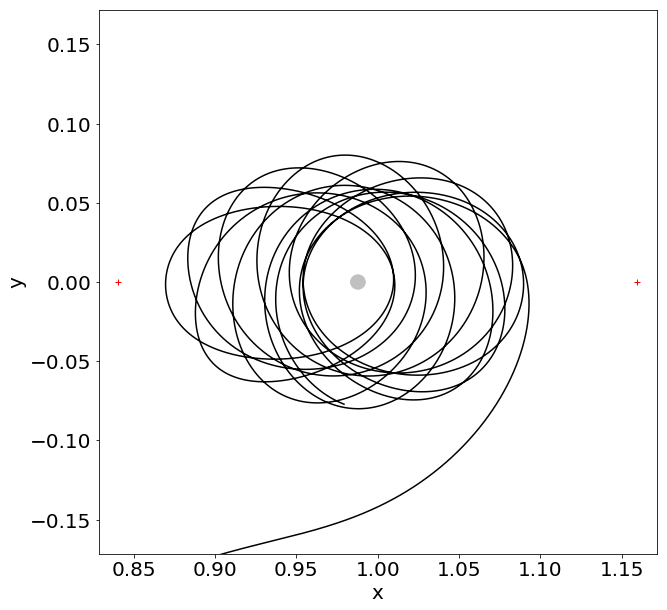

In [74]:
Moon = plt.Circle((1-mu, 0), R_l/D, color='silver')
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_artist(Moon)
plt.plot(x, y, color = 'k', linestyle = '-')
#plt.plot(x[260000:300000], y[260000:300000])
plt.plot(la1, 0, color='r', marker='+')
plt.plot(la2, 0, 'r+')
plt.xlim(la1-mu,la2+mu)
plt.ylim(-(la2-la1)/2-mu,(la2-la1)/2+mu)
plt.xlabel('x',size=20)
plt.ylabel('y', size=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
print("Minimun distance to moon surface: ", int((min(r2)*D-R_l)*1e-3), "km")

name='f20T4' + 'f' + str(int(f*f0)) + 'T' + str(frac) + 'fS' + str(int(fStop*f0))
#name='f' + str(int(f*f0)) + 'T' + str(frac)
name
#plt.savefig(name + 'Zoom.png')
#plt.savefig(name + 'Zoom.pdf')
#plt.savefig(name + 'Zoom.eps')

lapse in days =  109.14095801342548


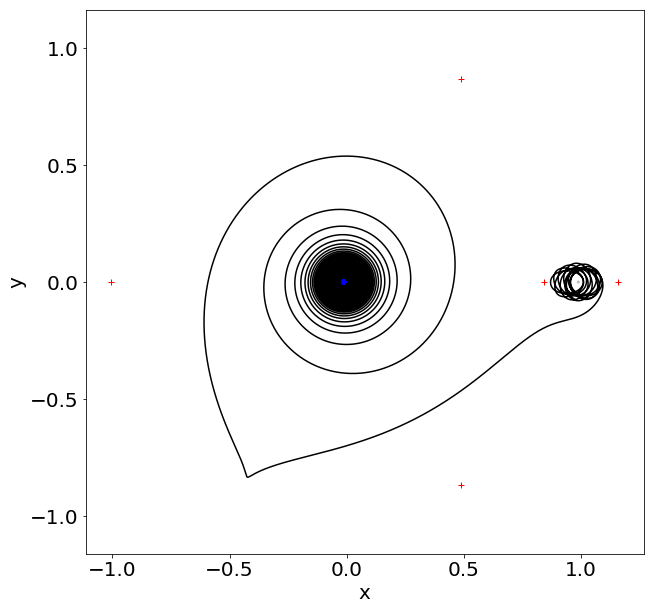

In [75]:

Earth = plt.Circle((-mu, 0), R_e/D, color='blue')
Moon = plt.Circle((1-mu, 0), R_l/D, color='silver')
fig, ax = plt.subplots(figsize=(10, 10))
ax.add_artist(Earth)
ax.add_artist(Moon)

#plt.plot(-mu, 0, 'bo')
#plt.plot(1-mu, 0, 'k.')
plt.plot(la1, 0, color='r', marker='+')
plt.plot(la2, 0, 'r+')
plt.plot(la3, 0, 'r+')
plt.plot(la4[0], la4[1], 'r+')
plt.plot(la5[0], la5[1], 'r+')
#plt.grid()
#plt.title('H$_0$ = {H_0} km, v$_0$ = {v_0:1.1f} km/s'.format(H_0=int(1e-3*H0), v_0=v0*n*D*1e-3), size=30)
plt.xlabel('x',size=20)
plt.ylabel('y', size=20)
plt.axis('equal')
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.plot(x, y, color = 'k', linestyle = '-')
#plt.xlim(-mu-0.1,-mu+0.1)
#plt.ylim(-0.12,0.12)
#plt.plot(x[0:500], y[0:500])
#plt.plot(x[0:130000], y[0:130000], color = 'k', linestyle = '-')
#plt.plot(x[0:285446], y[0:285446])
lapse = N*dt/n/3600/24
print("lapse in days = ", lapse)

#plt.savefig(name + '.png')
#plt.savefig(name + '.pdf')
#plt.savefig(name + '.eps')

Minimum value of Cmin =  3.011045864793155 and final value of Cfinal =  3.1910662723638246


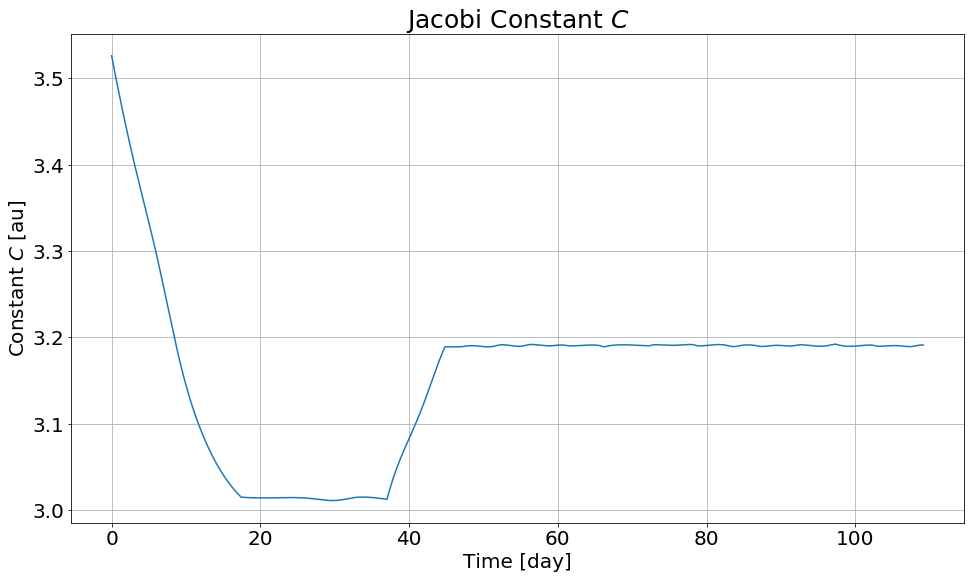

In [76]:
#plt.grid()
fig = plt.figure(figsize=(16,9))
plt.grid()
plt.title('Jacobi Constant $C$', size=25)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Time [day]',size=20)
plt.ylabel('Constant $C$ [au]', size=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.plot(t/n/3600/24, C)
#plt.ylim(C0*.99995,C0*1.00005)
#plt.savefig('transferOrbits\jacobiC\ ' + name + 'JacobiC.png')
#plt.savefig('transferOrbits\jacobiC\ ' + name + 'JacobiC.eps')
print("Minimum value of Cmin = ", min(C), "and final value of Cfinal = ", C[-1])

max height: 418496.3210381593


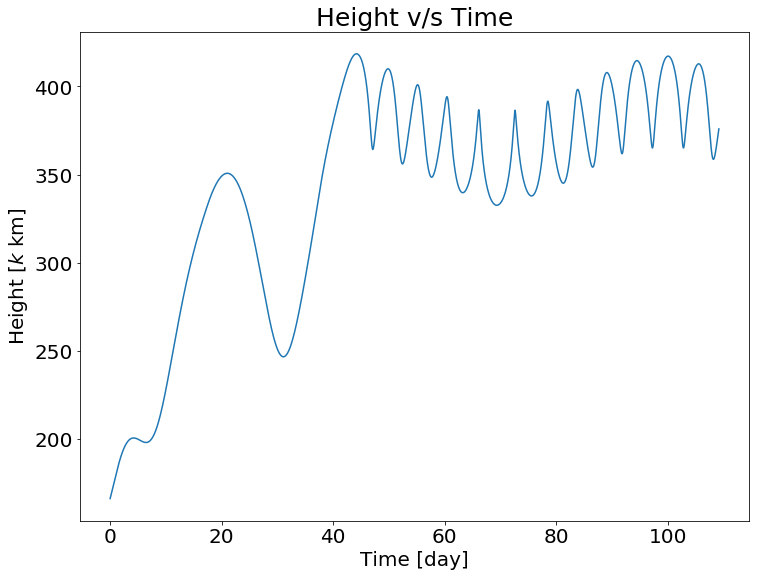

In [77]:
plt.figure(figsize=(12,9))
plt.plot(t/n/3600/24 ,(r1*D-R_e)*1e-6)
plt.title('Height v/s Time', size=25)
plt.xlabel('Time [day]',size=20)
plt.ylabel('Height [$k$ km]', size=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
print('max height:', max((r1*D-R_e)*1e-3))

#plt.savefig('Height_' + name + '.png')
#plt.savefig('Height_' + name + '.pdf')
#plt.savefig('Height_' + name + '.eps')

distance from the surface of the Moon to the sat with a minimun: r2_{Min}-r_l =  6667 km


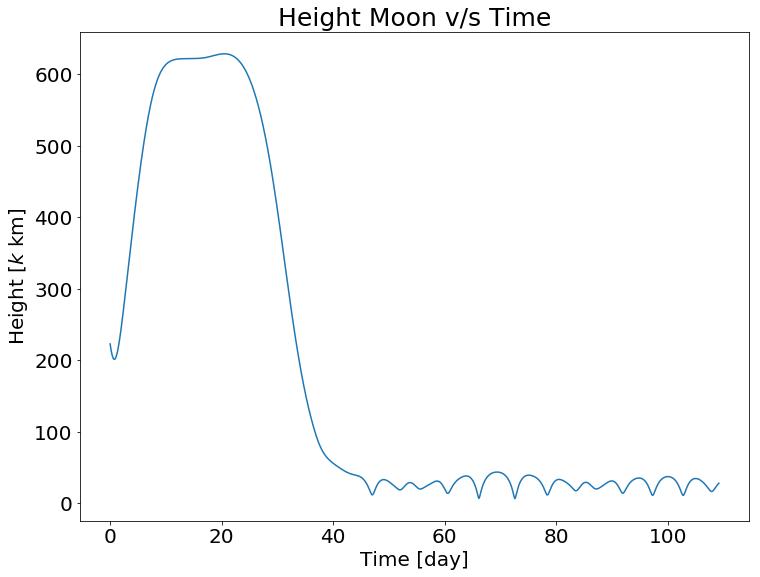

In [78]:
plt.figure(figsize=(12,9))
plt.plot(t/n/3600/24,(r2-r_l)*D*1e-6)
plt.title('Height Moon v/s Time', size=25)
plt.xlabel('Time [day]',size=20)
plt.ylabel('Height [$k$ km]', size=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
print("distance from the surface of the Moon to the sat with a minimun: r2_{Min}-r_l = ", int(min(r2*D*1e-3)-R_l*1e-3), 'km')

#plt.savefig('HighMoon'+ Ti + 'T' + Tf + '.png')
#plt.savefig('HighMoon'+ Ti + 'T' + Tf + '.eps')
#plt.savefig('HighMoon'+ Ti + 'T' + Tf + '.pdf')

In [79]:
# Play Windows exit sound. 
winsound.PlaySound("SystemExit", winsound.SND_ALIAS)

In [70]:
###Defining new initial condition in function of the last point obtained in the first computing
xf, yf, vxf, vyf, mf, oSf, tf= x[-1], y[-1], vx[-1], vy[-1], m[-1], -wS*t[-1]+oS0, t[-1]